<a href="https://colab.research.google.com/github/Elena-Shabanova/-Python/blob/%D0%92%D0%9A%D0%A0-05.11.2022/%D0%92%D0%9A%D0%A0_%D1%81%D0%BB%D0%B0%D0%B1%D0%B5%D0%BD%D1%8C%D0%BA%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Данные** — открытые сведения о погоде в г. Оренбурге. Информация загружена с сайта "Расписание Погоды", rp5.ru
Датасет содержит данные метеостанции Оренбург, Россия, WMO_ID=35121, выборка с 01.01.2010 по 23.10.2022, все дни. 

**Цель**— предсказать погоду на определенный период и понять, тенденции в изменении погоды в регионе (или подвердить/опровергнуть влияние глобального потепления на погоду в регионе).

Данные содержат в себе температурные значения, следовательно, задача относится к классу задач машинного обучения с учителем, и представляет собой построение регрессии:
- обучение с учителем: в датасете есть как все необходимые признаки, на основе которых выполняется предсказание, так и сам целевой признак (температура окружающей среды).
- регрессия: будем считать, что температура окружающей среды — это непрерывная величина.

*В конечном итоге нужно построить как можно более точную модель,  которая на выходе дает легкоинтерпретируемые результаты, т.е. мы сможем понять на основании чего модель делает тот или иной вывод. Грамотно поставленная задача уже содержит в себе решение. *

Импорт

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

Загрузка файла с указанием пути

In [20]:
data = pd.read_excel('/content/drive/MyDrive/Oren_01.01.2010 -23.10.2022.xlsx', skiprows=6)
data.sample(5) # Вывод пяти случайных строк датафрейма

,Местное время в Оренбурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
26586,15.09.2013 20:00,17.6,755.5,765.9,-0.1,60.0,"Ветер, дующий с востока",2.0,NaN,NaN,...,Клочья (часто чечевицеобразные) высококучевых ...,Перистые плотные в виде клочьев или скрученных...,20,9.8,Осадков нет,12.0,NaN,NaN,NaN,NaN
8357,13.12.2019 11:00,-11.3,760.0,771.7,0.9,92.0,"Штиль, безветрие",0.0,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",20,-12.4,NaN,NaN,NaN,NaN,NaN,NaN
12991,13.05.2018 02:00,11.4,750.7,761.3,0.3,66.0,"Ветер, дующий с западо-северо-запада",2.0,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",20,5.2,NaN,NaN,NaN,NaN,NaN,NaN
7307,22.04.2020 17:00,9.7,739.6,750.1,-0.4,50.0,"Ветер, дующий с западо-юго-запада",11.0,19.0,20.0,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",20,-0.3,NaN,NaN,NaN,NaN,NaN,NaN
5595,22.11.2020 17:00,-8.3,768.3,780.0,-0.3,78.0,"Ветер, дующий с востоко-северо-востока",2.0,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...",Перистые (часто в виде полос) и перисто-слоист...,20,-11.5,NaN,NaN,NaN,NaN,NaN,NaN


Характеристика датасета

In [21]:
#data.shape[0] # Размер по горизонтали. Определим количество строк
#data.shape[1] # Размер по горизонтали. Определим количество столбцов
data.shape # Определим размеры сразу по двум осям

(37386, 29)

Таким образом, датасет содетжит 29 столбцов и 37386 записи

In [22]:
data.info() # Определим какой тип данных имеет тот или иной признак

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37386 entries, 0 to 37385
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Местное время в Оренбурге  37386 non-null  object 
 1   T                          37382 non-null  float64
 2   Po                         37348 non-null  float64
 3   P                          37344 non-null  float64
 4   Pa                         28408 non-null  float64
 5   U                          37379 non-null  float64
 6   DD                         37347 non-null  object 
 7   Ff                         37348 non-null  float64
 8   ff10                       3535 non-null   float64
 9   ff3                        7061 non-null   float64
 10  N                          37338 non-null  object 
 11  WW                         37386 non-null  object 
 12  W1                         10373 non-null  object 
 13  W2                         10374 non-null  obj

Результат показывает, что в наборе 37386 записи и есть много NA: 18 столбцов содержат пустоты. 
13 столбцов являются числовыми, остальные 16 имеют текстовые значения/характеристики. 
Столбцов с числовыми значениями, но имеющих тип object (например, символьный) не обнаружено. 

In [23]:
# Функция для вычисления пропущенных значений по столбцу
def missing_values_table(dt):
  mis_val = dt.isnull().sum() # Общее количество пропущенных значений
  mis_val_percent = 100 * dt.isnull().sum() / len(data) # Процент пропущенных значений
  # Сформируем таблицу с результатами
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Пропущенные значения', 1 : '% от общего числа значений'})# Переименование столбцов
  # Сортировка таблицы по проценту пропущенных элементов по убыванию
  mis_val_table_ren_columns = mis_val_table_ren_columns[
                              mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
                              '% от общего числа значений', ascending=False).round(1)
  # Вывод сводной информации
  print ("Выбранный фрейм данных содержит " + str(dt.shape[1]) + " стобца(ов).\n"      
            "Есть " + str(mis_val_table_ren_columns.shape[0]) +
              " столбцы(ов), в которых отсутствуют значения.")
        
  return mis_val_table_ren_columns      # Возврат фрейма данных (таблички) с отсутствующей информацией
        

In [24]:
missing_values_table(data)

Выбранный фрейм данных содержит 29 стобца(ов).
Есть 27 столбцы(ов), в которых отсутствуют значения.


,Пропущенные значения,% от общего числа значений
Tg,35601,95.2
sss,35585,95.2
E',35495,94.9
E,35124,93.9
ff10,33851,90.5
Tx,32717,87.5
Tn,32068,85.8
ff3,30325,81.1
RRR,29124,77.9
tR,29124,77.9


Первичная очистка данных

Удалим столбцы с высоким процентом пропущенных значений, вероятно, что от них не будет большой пользы, но выборочно.
Удалим следующие столбцы:
*   Tg, содержащий минимальную температуру поверхноcти почвы и имеющий 95,2 % отсутствующих значений;
*    ff10 - 90,5 % с отсутствующих значений, характеристика скорости ветра м/с;
*   ff3 - 81,1 % отсутствующих значений, тоже отностися к группе характеристик скорости ветра.
 
 Другие столбцы с большим процентом пустот оставим, так как они могут оказывать влияние на целевые значения

In [25]:
data = data.drop(columns=['Tg', 'ff10', 'ff3'], errors='ignore')

In [26]:
data.info() # Проверка удаления именно тех столцов, что и планировались

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37386 entries, 0 to 37385
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Местное время в Оренбурге  37386 non-null  object 
 1   T                          37382 non-null  float64
 2   Po                         37348 non-null  float64
 3   P                          37344 non-null  float64
 4   Pa                         28408 non-null  float64
 5   U                          37379 non-null  float64
 6   DD                         37347 non-null  object 
 7   Ff                         37348 non-null  float64
 8   N                          37338 non-null  object 
 9   WW                         37386 non-null  object 
 10  W1                         10373 non-null  object 
 11  W2                         10374 non-null  object 
 12  Tn                         5318 non-null   float64
 13  Tx                         4669 non-null   flo

Очистка данных: удаление пробелов, изменение формата даты (из американского в более привычный).

Создание нового столбца - номер дня в году

In [27]:
data = data[data['T'].notna()] #Удалить пропуски

data['date'] = pd.to_datetime(data['Местное время в Оренбурге'], dayfirst=True) #Из американского в наш формат даты
data.head(5) #Для проверки изменений


,Местное время в Оренбурге,T,Po,P,Pa,U,DD,Ff,N,WW,...,Cm,Ch,VV,Td,RRR,tR,E,E',sss,date
0,23.10.2022 23:00,0.6,759.7,770.8,-1.0,72.0,"Ветер, дующий с юго-юго-востока",3.0,40%.,,...,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",20,-3.9,NaN,NaN,NaN,NaN,NaN,2022-10-23 23:00:00
1,23.10.2022 20:00,1.0,760.7,771.7,-0.5,73.0,"Ветер, дующий с юго-юго-востока",4.0,20–30%.,,...,Клочья (часто чечевицеобразные) высококучевых ...,"Перистых, перисто-кучевых или перисто-слоистых...",20,-3.3,Осадков нет,12.0,NaN,NaN,NaN,2022-10-23 20:00:00
2,23.10.2022 17:00,3.7,761.2,772.3,-0.9,57.0,"Ветер, дующий с юга",2.0,60%.,,...,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",20,-4.1,NaN,NaN,NaN,NaN,NaN,2022-10-23 17:00:00
3,23.10.2022 14:00,4.3,762.1,773.0,-0.2,53.0,"Ветер, дующий с юго-юго-запада",3.0,70 – 80%.,,...,"Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",20,-4.5,NaN,NaN,NaN,NaN,NaN,2022-10-23 14:00:00
4,23.10.2022 11:00,0.0,762.3,773.5,0.8,87.0,"Ветер, дующий с юго-востока",1.0,"90 или более, но не 100%",,...,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",20,-2.0,NaN,NaN,NaN,NaN,NaN,2022-10-23 11:00:00


In [28]:
data.date.dtype

dtype('<M8[ns]')

Вывод на экран показал, что столбец date создан и содержит значения даты и времени замера. 
Пояснение относительно типа: datetime64[ns] - это общее наименование типа данных, в то время как <M8[ns] - это конкретный тип, но он принадлежит (сопоставим с) datetime64

In [29]:
data.shape[0] # Проверка изменения размера датасета после удаления пропусков

37382

Действительно, количество записей сократилось на 4 шт. проверка в excel показала тоже количество null

In [30]:
# Перечень уникальных значений и количество каждого значения в колонке с Типом осадков.Пока не знаю зачем, но симпатично, вдруг пригодиться
data['WW'].value_counts() 

                                                                                                                          26744
Состояние неба в общем не изменилось.                                                                                      3162
Снег непрерывный слабый в срок наблюдения.                                                                                 1505
Отдельные кристаллы снега в виде звездочек (с туманом или без него).                                                       1198
Дождь незамерзающий непрерывный слабый в срок наблюдения.                                                                   830
                                                                                                                          ...  
Состояние неба в общем не изменилось.  Высота свежевыпавшего снега составляет 8 см.                                           1
Снег непрерывный умеренный в срок наблюдения.  Высота свежевыпавшего снега составляет 10 см.            

In [31]:
data.describe() # Первичная статистика по датасету

,T,Po,P,Pa,U,Ff,Tn,Tx,Td,tR
count,37382.000000,37344.000000,37340.000000,28407.000000,37379.000000,37345.000000,5317.000000,4668.000000,37379.000000,8262.0
mean,6.487569,753.127145,764.009869,-0.000542,65.461248,3.412023,0.414049,11.401692,-1.032130,12.0
std,14.604067,7.683388,8.118482,0.824832,22.822079,2.047170,12.705763,15.693076,10.628268,0.0
min,-34.700000,721.900000,732.400000,-5.100000,7.000000,0.000000,-34.700000,-27.700000,-37.400000,12.0
25%,-4.400000,747.900000,758.400000,-0.500000,47.000000,2.000000,-8.800000,-1.800000,-7.600000,12.0
50%,7.000000,752.300000,763.000000,0.000000,71.000000,3.000000,1.000000,12.500000,0.100000,12.0
75%,18.300000,757.700000,768.900000,0.500000,85.000000,5.000000,11.000000,25.400000,7.300000,12.0
max,40.000000,785.800000,798.300000,5.200000,100.000000,14.000000,26.200000,40.800000,21.800000,12.0


Первичная статистика по датасету - это качественный, а не количественный как при data.info(), обзор его содержимого. 
Первичная характеристика содержит среднее значение, стандартное отклонение, минимум и максимум, верхние значения первого и третьего квартиля и медиану по каждому столбцу.

Первичный анализ показал, что максимальная температура за всю историю наблюдений на данной точке г. Оренбурга (12 лет с 01.01.2010 по 23.10.2022) составила 40 градусов, а минимальная -34,7. Средняя температура выше среднегодовой температуры в РФ и составляет почти 6,5 градусов.
Средняя температура выше среднегодовой температуры в РФ и составляет почти 6,5 градусов.
Регион степной, поэтому влажность (столбец U), среднее значение составило 65,46 % и тд.

In [32]:
data['dayofyear'] = data['date'].dt.dayofyear #Создание столбца с содержимым в виде числового номера дня в году
data.sample(3) #Для проверки

,Местное время в Оренбурге,T,Po,P,Pa,U,DD,Ff,N,WW,...,Ch,VV,Td,RRR,tR,E,E',sss,date,dayofyear
5295,30.12.2020 05:00,-11.1,767.8,779.7,0.1,87.0,"Ветер, дующий с востока",1.0,100%.,,...,NaN,20,-12.8,NaN,NaN,NaN,NaN,NaN,2020-12-30 05:00:00,365
25221,05.03.2014 11:00,-12.1,757.6,769.3,0.3,70.0,"Ветер, дующий с востока",4.0,70 – 80%.,,...,"Перистые нитевидные, иногда когтевидные, не ра...",20,-16.5,NaN,NaN,NaN,NaN,NaN,2014-03-05 11:00:00,64
33343,23.05.2011 02:00,17.5,750.5,760.9,NaN,62.0,"Штиль, безветрие",0.0,"10% или менее, но не 0",,...,Перистые плотные в виде клочьев или скрученных...,20,10.2,NaN,NaN,NaN,NaN,NaN,2011-05-23 02:00:00,143


Визуализация изменения температур в течение загруженного периода наблюдений и скользяцей средней с целью обнаружения тенденций (сезонность должна быть, поэтому проверяем только температуру и тренд) относительно гипотезы о глобальном петеплении

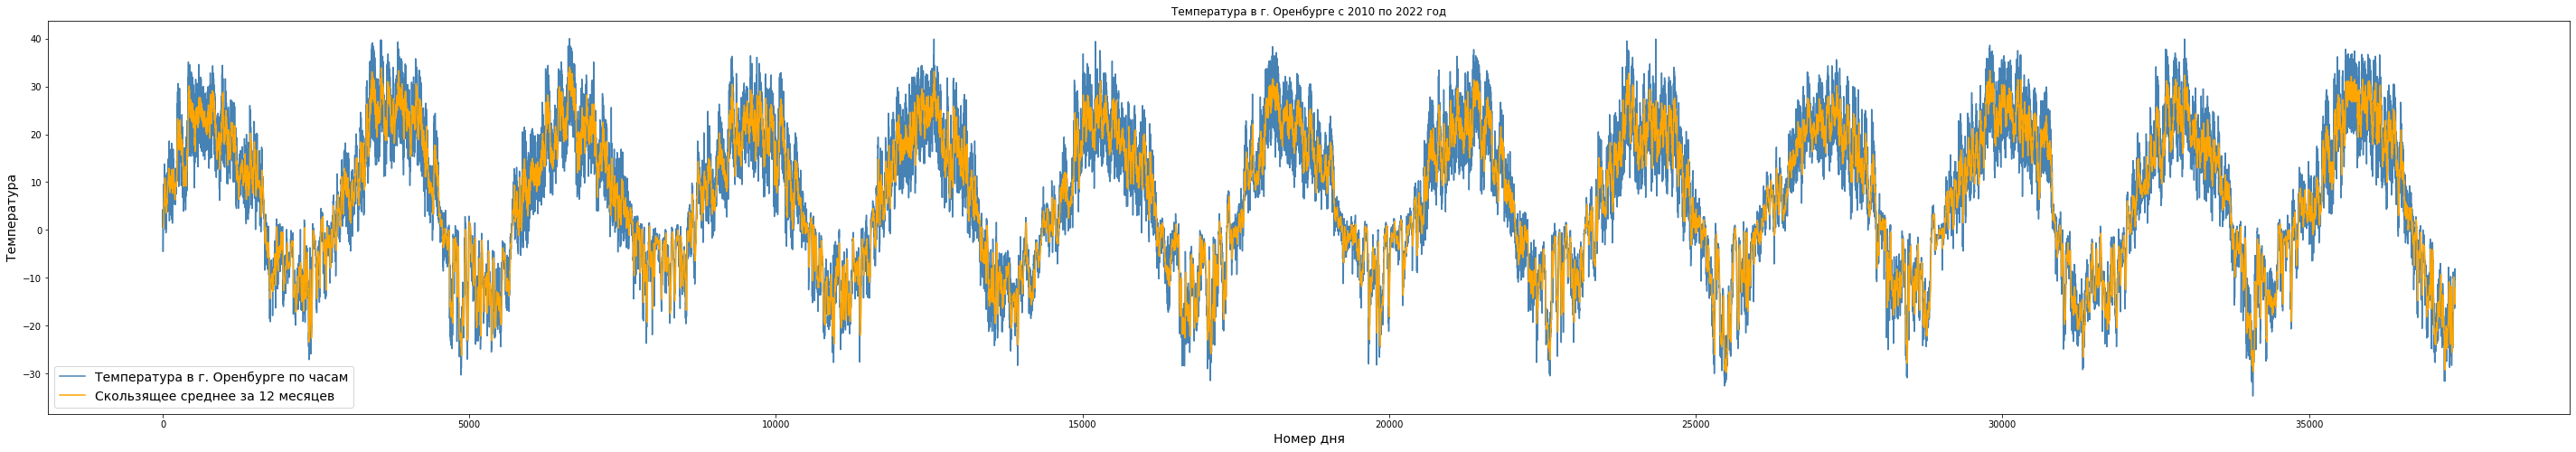

In [33]:
# зададим размер графика
plt.figure(figsize = (50,8))
 
# поочередно зададим кривые (с изменением температуры по времени и скользящее среднее) с подписями и цветом
plt.plot(data['T'], label = 'Температура в г. Оренбурге по часам', color = 'steelblue')
plt.plot(data['T'].rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', fontsize = 14, loc=0)
 
# добавим подписи к осям и заголовки
plt.xlabel('Номер дня', fontsize = 14)
plt.ylabel('Температура', fontsize = 14)
plt.title('Температура в г. Оренбурге с 2010 по 2022 год', fontsize = 12)
 
# выведем обе кривые на одном графике
plt.show()

Скользящее среднее сильно сглаживает показатели. В данном случае было взято окно равное двенадцати месяцам, поэтому первое значение скользящего среднего  получили только за декабрь 2010 года (самое начало желтой кривой на графике).

В целом бесполезная визуализация, много значений, тенденции и особенности не видны, необходимо группировать/вырезать/агрегировать данные.

Text(0.5, 1.0, 'Проба визуализации каких-либо особенностей и тенденций на маленьком объеме данных (12 лет) и сжато')

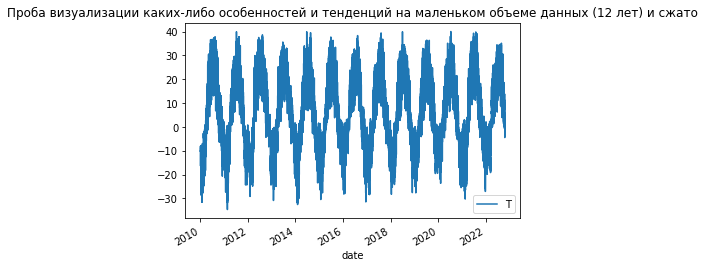

In [34]:
data.plot(x='date', y='T')# Просто для проверки в маленьком масштабе
plt.title('Проба визуализации каких-либо особенностей и тенденций на маленьком объеме данных (12 лет) и сжато')

Чтобы подтвердить, что для определения тенденции на похолодание или петепление на такой маленкой выборке не возможно, нужны столетия, а лучше тысячалетия. Сйчас видно, что по температурным показателям год 2022 похож на на 2014 и он значительно не теплее или холоднее предыдущих. 

In [35]:
# Разбиваем столбец "Местное время в Оренбурге" на список на основании разделителей (точка и пробел)
from numpy import int64
new_data = data['Местное время в Оренбурге'].str.split('.',expand=True) # Используем функцию str.split с параметром expand=True, позволяющим сразу сделать разбиение на колонки и получить датафрейм
new_data.columns=['День','Месяц','Год с временем'] # Переименуем колонки датафрейма, чтобы каждая из них содержала название соответствующего ключа
new_date = new_data['Год с временем'].str.split(' ',expand=True) # Отделяем год от времени - часов и минут
new_date.columns=['Год','Время'] # Переименует колонки из 0 и 1 в Год и Время
new_date=new_date.drop('Время', axis=1) # Время, удалим, возможно, не пригодиться
final_data = pd.concat([new_data,new_date],axis=1).drop('Год с временем', axis=1) # Соединяем всё в новом датафрейме, удалив ненужную теперь колонку Год с временем
final_data = final_data.astype(int64) # Меняем тип всех столбцов методом astype без словаря
data=pd.concat([final_data,data],axis=1)
data.info()
#data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37382 entries, 0 to 37385
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   День                       37382 non-null  int64         
 1   Месяц                      37382 non-null  int64         
 2   Год                        37382 non-null  int64         
 3   Местное время в Оренбурге  37382 non-null  object        
 4   T                          37382 non-null  float64       
 5   Po                         37344 non-null  float64       
 6   P                          37340 non-null  float64       
 7   Pa                         28407 non-null  float64       
 8   U                          37379 non-null  float64       
 9   DD                         37344 non-null  object        
 10  Ff                         37345 non-null  float64       
 11  N                          37334 non-null  object        
 12  WW  

In [36]:
data_crez=data[['Месяц','T','Tn','Tx','U','Ff']]# Расчитаем среднее значение по группе Температура воздуха, влажность и скорость ветра помесячно за весь период наблюдения (датасета)
data_crez.groupby('Месяц').mean() # Если нужна медиана, то меняем строчку на data_crez.groupby('Месяц').median(). Объединять смысла нет, перегружен вывод

,T,Tn,Tx,U,Ff
Месяц,,,,,
1,-12.366843,-15.228846,-9.444307,80.908328,3.532007
2,-11.286783,-14.480525,-7.729428,81.417691,3.294057
3,-4.229560,-7.806263,-0.597500,80.033189,3.901304
4,8.523845,3.112129,14.185567,61.335366,3.870770
5,16.989323,9.865291,23.401244,50.705773,3.541589
6,21.327503,13.967506,27.776923,50.047497,3.213620
7,23.599503,16.171429,30.235980,49.167029,3.080695
8,22.543185,15.125917,29.390323,47.867081,3.039203
9,14.415138,8.656479,20.546036,57.485888,3.109365


In [ ]:
#data_crez=data[['Месяц','T','Tn','Tx','U','Ff']]# Расчитаем медиану по группе Температура воздуха, влажность и скорость ветра помесячно за весь период наблюдения (датасета)
#data_crez.groupby('Месяц').median()

,T,Tn,Tx,U,Ff
Месяц,,,,,
1,-12.1,-15.35,-9.40,83.0,3.0
2,-10.7,-14.70,-7.20,83.0,3.0
3,-3.0,-6.50,-0.10,82.0,4.0
4,7.9,2.65,13.90,64.0,4.0
5,16.3,9.95,23.30,48.0,3.0
6,21.0,14.10,27.40,47.0,3.0
7,23.4,16.20,30.30,46.0,3.0
8,22.1,15.40,30.20,45.0,3.0
9,13.8,8.50,20.80,57.0,3.0


Tn -  минимальная температура воздуха (градусы Цельсия) за прошедший период (не более 12 часов)
Tx - максимальная температура воздуха (градусы Цельсия) за прошедший период (не более 12 часов)
U - относительная влажность (%) на высоте 2 метра над поверхностью земли
Ff - cкорость ветра на высоте 10-12 метров над земной поверхностью, осредненная за 10-минутный период, непосредственно предшествовавший сроку наблюдения (метры в секунду)

Построим сводную таблицу для анализа средних или медианных значений месячных температур по годам

In [38]:
# Можно удалить инф-ция избыточна, лучше работать с транcпонированной матрицей, анализ удобнее делать
data_crez=data[['Месяц','T','Tn','Tx','U','Ff','Год']]
svod_tab=pd.pivot_table(data_crez,
index = ['Месяц'],
columns = ['Год'],
values = 'T',
aggfunc = ['median', 'mean'])# Надо оставить что-то одно, лучше медиану - загружено сильно
svod_tab

median                                                                 \
Год     2010   2011   2012   2013   2014   2015   2016   2017   2018   2019   
Месяц                                                                         
1     -19.30 -14.00 -12.20 -11.35 -13.90 -12.95 -11.50 -11.50 -13.40 -11.60   
2     -15.10 -16.30 -16.80 -10.95 -16.30  -9.35  -3.20 -13.45 -10.05 -11.20   
3      -4.55  -4.80  -4.25  -1.85  -1.00  -4.20  -0.70  -4.00  -7.85  -0.15   
4       6.90   6.95  16.10   9.70   4.45   6.00   9.90   6.80   6.10   8.10   
5      18.30  15.40  18.45  16.90  18.30  15.00  14.75  13.95  16.05  17.75   
6      24.70  18.75  23.40  21.65  20.20  23.90  19.55  17.75  18.50  21.05   
7      25.90  25.30  24.80  22.30  19.80  21.10  22.60  23.05  25.10  22.10   
8      24.10  19.75  24.20  20.20  24.05  18.60  26.15  22.75  20.50  17.50   
9      15.35  13.90  13.90  14.20  13.45  16.05  12.40  14.70  15.75  10.30   
10      4.80   6.50   8.25   6.40   4.40   4.00   2.45   5.20   6.95   8.60   
11      3.30  -6.20  -0.30   2.35  -3.45  -0.70  -2.50   0.70  -4.25  -3.60   
12     -2.40 -11.80 -12.05  -7.00  -7.20  -1.90 -11.70  -7.75 -11.15  -5.60   

       ...       mean                                                         \
Год    ...       2013       2014       2015       2016       2017       2018   
Месяц  ...                                                                     
1      ... -12.299194 -13.547177 -12.808871 -12.274597 -11.569355 -13.697984   
2      ... -10.900446 -15.810714 -10.558929  -3.916883 -11.874107 -10.723214   
3      ...  -3.394355  -2.850000  -4.616532  -0.997177  -4.766935  -8.558871   
4      ...  10.463333   5.793750   6.165417  10.024167   6.840417   6.660000   
5      ...  17.432661  19.037903  16.310081  15.888306  14.337903  16.565726   
6      ...  22.083333  20.791667  24.203333  19.825000  18.190000  18.806667   
7      ...  22.384825  19.955242  21.439516  22.721138  22.755242  25.468548   
8      ...  20.641935  23.931855  19.127126  26.189516  22.991532  20.792742   
9      ...  14.487500  13.481667  16.211250  13.392083  15.220417  16.350833   
10     ...   6.301210   4.212903   4.196341   4.222177   5.338710   7.240323   
11     ...   2.652500  -3.983750  -2.047917  -4.160833   0.894167  -4.339583   
12     ...  -7.137500  -7.933065  -3.838462 -12.879435  -8.017742 -11.543548   

                                                   
Год         2019       2020       2021       2022  
Месяц                                              
1     -12.639113  -5.487097 -11.410081 -10.634274  
2     -11.595982  -5.473707 -12.234821  -5.615179  
3      -0.944355   1.569758  -6.397984  -6.051210  
4       8.460000   7.474167   8.220833  11.061667  
5      17.832258  16.963710  21.222984  12.225403  
6      21.424167  20.097500  24.603347  19.769456  
7      22.269355  25.819355  24.432661  22.623770  
8      18.772581  20.659677  25.822581  24.143145  
9      11.214167  13.669167  12.885356  15.274167  
10      8.929839   7.196371   6.956048   8.573370  
11     -3.832917  -3.842917  -2.216318        NaN  
12     -6.393927 -14.212903  -7.805242        NaN  

[12 rows x 26 columns]

In [83]:
#data_crez=data[['Месяц','T','Tn','Tx','U','Ff','Год']]
svod_tab2=pd.pivot_table(data_crez,
index = ['Год'],
columns = ['Месяц'],
values = 'T',
aggfunc = ['median'])
svod_tab2


median                                                               \
Месяц     1      2     3      4      5      6      7      8      9     10   
Год                                                                         
2010  -19.30 -15.10 -4.55   6.90  18.30  24.70  25.90  24.10  15.35  4.80   
2011  -14.00 -16.30 -4.80   6.95  15.40  18.75  25.30  19.75  13.90  6.50   
2012  -12.20 -16.80 -4.25  16.10  18.45  23.40  24.80  24.20  13.90  8.25   
2013  -11.35 -10.95 -1.85   9.70  16.90  21.65  22.30  20.20  14.20  6.40   
2014  -13.90 -16.30 -1.00   4.45  18.30  20.20  19.80  24.05  13.45  4.40   
2015  -12.95  -9.35 -4.20   6.00  15.00  23.90  21.10  18.60  16.05  4.00   
2016  -11.50  -3.20 -0.70   9.90  14.75  19.55  22.60  26.15  12.40  2.45   
2017  -11.50 -13.45 -4.00   6.80  13.95  17.75  23.05  22.75  14.70  5.20   
2018  -13.40 -10.05 -7.85   6.10  16.05  18.50  25.10  20.50  15.75  6.95   
2019  -11.60 -11.20 -0.15   8.10  17.75  21.05  22.10  17.50  10.30  8.60   
2020   -3.95  -4.95  1.75   6.65  15.90  19.85  25.20  19.85  12.65  7.55   
2021  -10.95 -13.60 -3.90   7.55  21.40  24.10  24.00  25.30  12.40  7.20   
2022  -10.80  -5.45 -6.60  10.05  12.15  19.40  22.80  24.70  14.40  8.85   

                    
Месяц    11     12  
Год                 
2010   3.30  -2.40  
2011  -6.20 -11.80  
2012  -0.30 -12.05  
2013   2.35  -7.00  
2014  -3.45  -7.20  
2015  -0.70  -1.90  
2016  -2.50 -11.70  
2017   0.70  -7.75  
2018  -4.25 -11.15  
2019  -3.60  -5.60  
2020  -4.60 -14.70  
2021  -1.70  -5.70  
2022    NaN    NaN

In [54]:
svod_tab2.describe() # Первичная аналитика сводной таблицы


median                                                         \
Месяц         1          2          3          4          5          6    
count  13.000000  13.000000  13.000000  13.000000  13.000000  13.000000   
mean  -12.107692 -11.284615  -3.238462   8.096154  16.484615  20.984615   
std     3.317620   4.566654   2.700243   2.918223   2.389594   2.352161   
min   -19.300000 -16.800000  -7.850000   4.450000  12.150000  17.750000   
25%   -13.400000 -15.100000  -4.550000   6.650000  15.000000  19.400000   
50%   -11.600000 -11.200000  -4.000000   6.950000  16.050000  20.200000   
75%   -11.350000  -9.350000  -1.000000   9.700000  18.300000  23.400000   
max    -3.950000  -3.200000   1.750000  16.100000  21.400000  24.700000   

                                                                         
Месяц         7          8          9          10         11         12  
count  13.000000  13.000000  13.000000  13.000000  12.000000  12.000000  
mean   23.388462  22.126923  13.803846   6.242308  -1.745833  -8.245833  
std     1.838948   2.831270   1.587249   1.948915   2.900976   4.044551  
min    19.800000  17.500000  10.300000   2.450000  -6.200000 -14.700000  
25%    22.300000  19.850000  12.650000   4.800000  -3.762500 -11.725000  
50%    23.050000  22.750000  13.900000   6.500000  -2.100000  -7.475000  
75%    25.100000  24.200000  14.700000   7.550000  -0.050000  -5.675000  
max    25.900000  26.150000  16.050000   8.850000   3.300000  -1.900000

Разбивка дата-фрейма на части: тренировочная и тестовая выборки

In [55]:
data_train = data[data['date'] < '2018-01-01']
data_test = data[data['date'] >= '2018-01-01']

Обучение модели


Для того, чтобы обучить модель, разделим выборку на признаки (X) и таргет (целевую переменную, которую прогнозируем, target, y)


---

*2 датасета train-test х 2 features-target - создаем 4 переменных: X_train, y_train, X_test, y_test*

Прогноз будет строиться на номере дня в году data['dayofyear']
Модель ожидает, что ей на вход придет двумерная таблица - поэтому создаем из колонки date['T'] полноценную таблицу DataFrame


In [56]:
X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']

X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']

# "y" оставляем столбцом, как есть
y_train = data_train['T']
y_test = data_test['T']

1) X_train — это включает в себя все ваши независимые переменные (с 01.01.2010 до 2018-01-01), они будут использоваться для обучения модели, эти данные будут использоваться для обучения/подгонки модели (70 % всех данных).

2) X_test — это оставшаяся часть независимых переменных данных (с 2018-01-01 до 23.10.2022), которые не будут использоваться на этапе обучения и будут использоваться для прогнозов для проверки точности модели (30 % всех данных).

3) y_train - это зависимая переменная, которая должна быть предсказана этой моделью, нужно указать эту зависимую переменную при обучении/подгонке модели.

4) y_test — эти данные будут использоваться для проверки точности между фактическими и прогнозируемыми категориями.

In [57]:
from sklearn.linear_model import LinearRegression #Подгружем часть sklearn
model = LinearRegression() #  Cоздаем экземпляр класса LinearRegression, который представит модель линейной регрессии
model.fit(X_train, y_train)# Cоздаем и приспосабливаем модель линейной регрессии к существующим данным

LinearRegression()

С помощью .fit() вычисляются оптимальные значение весов b₀ и b₁, используя существующие вход и выход (X_train и y_train) в качестве аргументов. Другими словами, .fit() совмещает модель. Она возвращает self - переменную model

Прогнозы для тренировочной части и тестовой выборки

In [58]:
pred_train = model.predict(X_train) # Получаем прогноз для тренировочных данных

pred_test = model.predict(X_test) # Получаем прогноз для тестовых данных


Визуализация результата работы модели

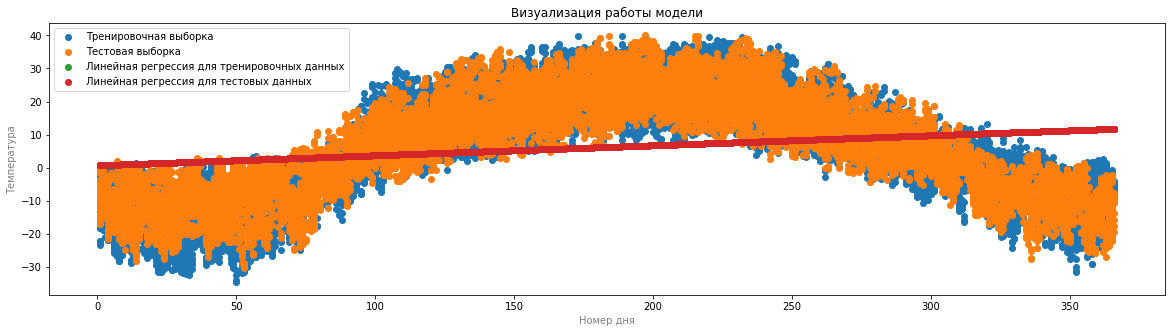

In [59]:
#Отрисовываем 1. тренировочную выборку, 2. тестовую выборку и результаты линейной регрессии - для 3. тренировочных и для 4. тестовых данных
plt.figure(figsize=(20, 5))
plt.scatter(X_train['dayofyear'], y_train, label='Тренировочная выборка') #тренировочная выборка
plt.scatter(X_test['dayofyear'], y_test, label='Тестовая выборка') # тестовая выборка
plt.scatter(X_train['dayofyear'], pred_train, label='Линейная регрессия для тренировочных данных') # результаты линейной регрессии для тренировочных данных
plt.scatter(X_test['dayofyear'], pred_test, label='Линейная регрессия для тестовых данных') # результаты линейной регрессии для тестовых данных

plt.legend() # легенда, вытягивает из label
plt.title('Визуализация работы модели')
plt.xlabel('Номер дня', color='gray')
plt.ylabel('Температура', color='gray')
plt.show()

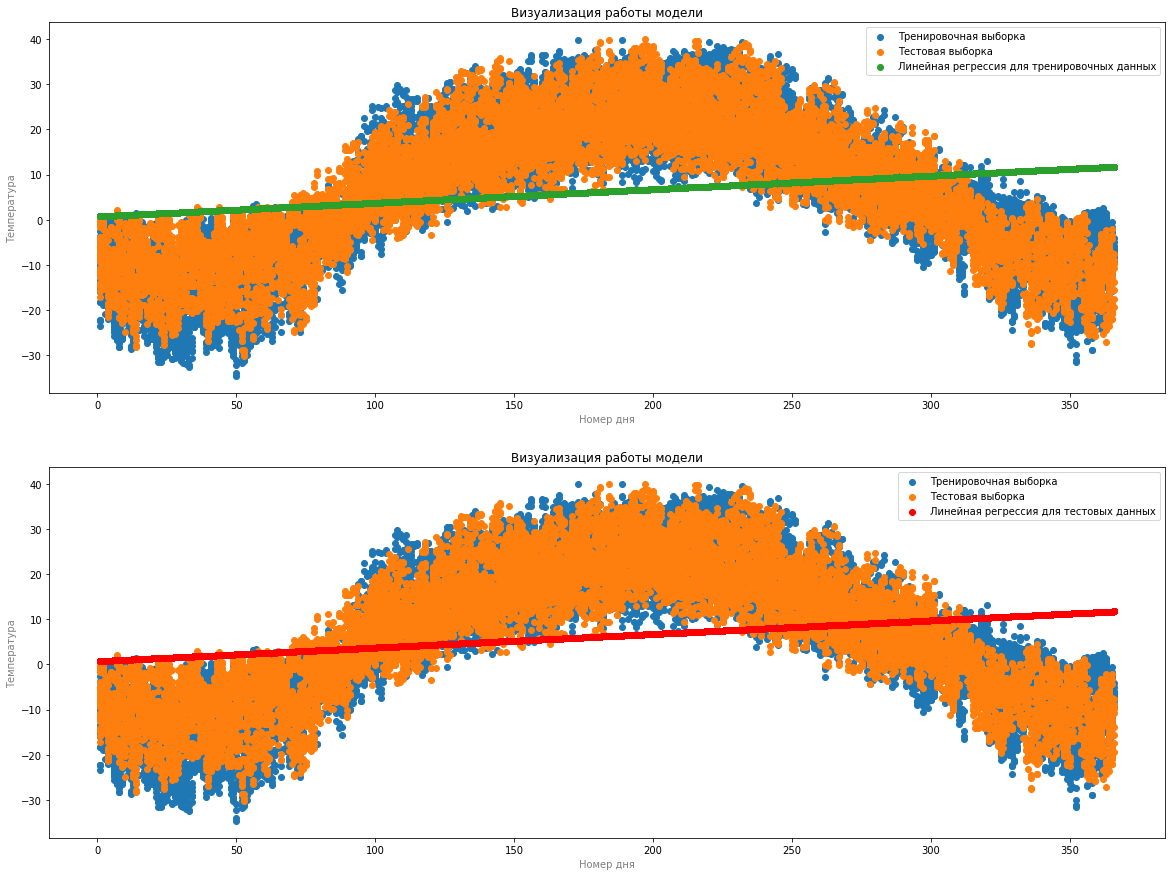

In [60]:
#Отрисовываем 1. тренировочную выборку, 2. тестовую выборку и результаты линейной регрессии - для 3. тренировочных и для 4. тестовых данных
plt.figure(figsize=(20, 15))# Лучше оставить отрисовку в фигуре, так как легенда большая и закрывает совокупность точек тренировочной и тестовой воборок, не масштабируется
plt.subplot(211) # верхний график
plt.scatter(X_train['dayofyear'], y_train, label='Тренировочная выборка') #тренировочная выборка
plt.scatter(X_test['dayofyear'], y_test, label='Тестовая выборка') # тестовая выборка
plt.scatter(X_train['dayofyear'], pred_train, label='Линейная регрессия для тренировочных данных') # результаты линейной регрессии для тренировочных данных
plt.legend() # легенда, вытягивает из label
plt.title('Визуализация работы модели')
plt.xlabel('Номер дня', color='gray')
plt.ylabel('Температура', color='gray')

plt.subplot(212) # нижний график
plt.scatter(X_train['dayofyear'], y_train, label='Тренировочная выборка') #тренировочная выборка
plt.scatter(X_test['dayofyear'], y_test, label='Тестовая выборка') # тестовая выборка
plt.scatter(X_test['dayofyear'], pred_test, label='Линейная регрессия для тестовых данных', color='red') # результаты линейной регрессии для тестовых данных
plt.legend() # легенда, вытягивает из label
plt.title('Визуализация работы модели')
#plt.grid(True) # не очень симпатично
plt.xlabel('Номер дня', color='gray')
plt.ylabel('Температура', color='gray')
plt.savefig('Linear_regression_test_and_training_data.png')# Запись в файл обеих картинок
plt.show()


В целом модель хорошо описывает временной ряд. Используем метрики для оценки качества модели: среднеквадратическую ошибку и корень из среднеквадратической ошибки

Оценка модели

In [61]:
print('Точность прогнозирования в % =', model.score(X_test, pred_test)*100) # Забавно!

Точность прогнозирования в % = 100.0


In [62]:
import numpy as np
from sklearn.metrics import mean_squared_error
# Среднеквадратическая ошибка
print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))
# Корень из среднеквадратической ошибки
print('Корень из среднеквадратической ошибки для тренировочных данных =', np.sqrt(mean_squared_error(y_train, pred_train)))
print('Корень из среднеквадратической ошибки для  тестовых данных =', np.sqrt(mean_squared_error(y_test, pred_test)))


Сумма ошибок на тренировочных данных = 208.4382329774305
Сумма ошибок на тестовых данных = 196.17071921113907
Корень из среднеквадратической ошибки для тренировочных данных = 14.43739010269621
Корень из среднеквадратической ошибки для  тестовых данных = 14.006095787589741


Вторая модель для сравнения - классификатор случайного леса
Разбиение на тестовую и тренировочную выборку оставляем в прежнем процентном соотношении

In [66]:
from sklearn import datasets, model_selection, metrics, ensemble
import pandas as pd

In [67]:
df=data[['День','Месяц','Год','T','Tn','Tx','Td','U','Ff','Po','P','dayofyear']]
df['target']=(df['Год']-2010)%3 # Веса творчески - остаток от деления на 3, т. 0, 1, 2
df.sample(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,День,Месяц,Год,T,Tn,Tx,Td,U,Ff,Po,P,dayofyear,target
28394,2,2,2013,-11.5,NaN,NaN,-14.1,81.0,0.0,754.0,765.7,33,0
18547,17,6,2016,21.2,17.4,NaN,14.6,66.0,1.0,753.0,763.3,169,0
27626,9,5,2013,13.2,NaN,NaN,1.3,45.0,2.0,752.2,762.8,129,0
26882,9,8,2013,23.5,NaN,26.7,15.6,61.0,8.0,741.9,751.9,221,0
17782,21,9,2016,10.4,NaN,NaN,6.4,76.0,3.0,752.1,762.7,265,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37382 entries, 0 to 37385
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   День       37382 non-null  int64  
 1   Месяц      37382 non-null  int64  
 2   Год        37382 non-null  int64  
 3   T          37382 non-null  float64
 4   Tn         5317 non-null   float64
 5   Tx         4668 non-null   float64
 6   Td         37379 non-null  float64
 7   U          37379 non-null  float64
 8   Ff         37345 non-null  float64
 9   Po         37344 non-null  float64
 10  P          37340 non-null  float64
 11  dayofyear  37382 non-null  int64  
 12  target     37382 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 4.0 MB


Очистка данных: в датафрейме df присутствуют 2 столбца Tn и Tx, относящихся к группе температурных показателей с максимальным количеством пропусков. Заменять пропуски нулевыми значениями не допустимо, поэтому создаём дубликат датасета, 2 столбца удаляем полностью, а в оставшихся удаляем пустоты

In [69]:
df_copied = df.copy() # Создание дубликата датасета, это избыточное действие, можно было работать с исходным df
df_copied = df_copied.drop(columns=['Tn', 'Tx'], errors='ignore') # Удаление столбцов
df_copied = df_copied[df_copied['Td'].notna()] #Удалить пропуски
df_copied = df_copied[df_copied['U'].notna()] #Удалить пропуски
df_copied = df_copied[df_copied['Ff'].notna()] #Удалить пропуски
df_copied = df_copied[df_copied['Po'].notna()] #Удалить пропуски
df_copied = df_copied[df_copied['P'].notna()] #Удалить пропуски
df=df_copied
df.info() # Проверка наличия пустот

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37302 entries, 0 to 37385
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   День       37302 non-null  int64  
 1   Месяц      37302 non-null  int64  
 2   Год        37302 non-null  int64  
 3   T          37302 non-null  float64
 4   Td         37302 non-null  float64
 5   U          37302 non-null  float64
 6   Ff         37302 non-null  float64
 7   Po         37302 non-null  float64
 8   P          37302 non-null  float64
 9   dayofyear  37302 non-null  int64  
 10  target     37302 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 3.4 MB


In [70]:
target = df["target"] # Проверка наличия весов (меток). Получается, что для данной модели будет три класса меток
target.sample(5)

28003    0
11374    2
16162    1
17026    0
602      0
Name: target, dtype: int64

In [71]:
# Разбиение на выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(df, df['target'], test_size=0.3, random_state=0)
print("Тренировочная выборка:", X_train.shape)
print("Тестовая выборка:", X_test.shape)


Тренировочная выборка: (26111, 11)
Тестовая выборка: (11191, 11)


In [72]:
# Обучение модели
classifier = ensemble.RandomForestClassifier()
model = classifier.fit(X_train, y_train)
model

RandomForestClassifier()

С помощью classifier.fit обучаем модель и создаем для нее параметры
Подготовленная таким образом модель пригодна для предоставления прогноза

In [73]:
model.score(X_test, y_test)

1.0

Проверка обученной модели на тестовом наборе данных, который создан ранее.
Получена точность предсказания 100 %. Достижение такого высокого уровня в пробном наборе данных настораживает, но допустимо, в реальных проектах такой показатель считается очень высоким, точнее недостижимым

In [74]:
#Отчет о работе модели
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4250
           1       1.00      1.00      1.00      3484
           2       1.00      1.00      1.00      3457

    accuracy                           1.00     11191
   macro avg       1.00      1.00      1.00     11191
weighted avg       1.00      1.00      1.00     11191



Используем classification_report для создания текстового отчета, показывающего основные метрики классификации.
Столбец с метками (0, 1, 2) - это имя метки классификации.
Suport - вспомогательный столбец - количество вхождений каждой метки. 
Строка среднего / общего значения - это среднее значение каждого столбца 
Три столбца f1-score для точного отзыва - это коэффициент точности (precision), отзыва (recall ) и значение f1 (f1-score) для каждой категории


Создадим файл, содержащий список внешних зависимостей, с целью его последующего использования по прошествию времени и с учетом многократной актуализации установленных пакетов программ

In [75]:
import sys
print(sys.modules.keys()) # вывод списка используемых модулей в виде словаря на экран
# Для отработки навыка записи результатов в csv-файл и работы с датафреймами, запишем список зависимостей не как обычно в txt-файл, а именно в csv
requirements=pd.DataFrame(sys.modules.keys())# Сохранение разультата в виде датафрейма в переменной requirements
requirements.head() # Для промежуточной проверки
requirements.to_csv('requirements.csv', index= False) # Сохранение файла в 'Сессионном хранилище'
print('Файл сохранён в сессионное хранилище!')

dict_keys(['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'warnings', 're', 'enum', 'types', '_collections', 'sre_compile', '_sre', 'sre_parse', 'sre_constants', 'functools', '_functools', 'collections', '_collections_abc', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', 'copyreg', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_sitebuiltins', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'google', 'google.cloud', 'google.logging', 'mpl_toolkits', 'sphinxcontrib', 'sitecustomize', 'runpy', 'pkgutil', 'weakref', '_weakrefset', 'ipykernel', 'ipykernel._version', 'ipykernel

Вывод: лучше использовать стандартный способ записи  requirements.txt файла в командной строке  pip freeze > requirements.txt. 

Использовать можно, но малоинформативно - в файле requirements.csv отсутствуют номера версий используемых зависимостей


Пояснение: "команда pip freeze выводит все установленные в интерпретатор сторонние пакеты. Заметьте, что в список попали не только прямые зависимости (pyowm), но и подзависимости — это даже лучше, потому что вы сможете более точно воссоздать окружение по этому файлу" https://semakin.dev/2020/04/requirements_txt/